In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [40]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [41]:
df=pd.read_csv("final-data.csv")

In [42]:
df.head()

,the_index,Title,DomesticTotalGross,RunTime,ReleaseDate,Director,ProductionBudget,InRelease,MpaaRating,Distributor,Genre,Nominations,Wins,IntDayOfTheYear,IntMonthOfTheYear,DayOfTheYear^2,OpeningGross,OpeningRank,OpeningRatio,GenreMap_Comedy
0,http://www.boxofficemojo.com/movies/?id=ali.htm,Ali,58203105.0,156.0,2001-12-25,Michael Mann,107000000.0,52,R,Sony / Columbia,Sports Drama,2,0,359,12,128881,14710892.0,4.0,25.275098,0
1,http://www.boxofficemojo.com/movies/?id=americ...,America's Sweethearts,93607673.0,102.0,2001-07-20,Joe Roth,46000000.0,101,PG-13,Sony (Revolution),Romantic Comedy,0,0,201,7,40401,30181877.0,2.0,32.242952,0
2,http://www.boxofficemojo.com/movies/?id=anygiv...,Any Given Sunday,75530832.0,157.0,1999-12-22,Oliver Stone,55000000.0,100,R,Warner Bros.,Sports Drama,0,0,356,12,126736,13584625.0,1.0,17.985536,0
3,http://www.boxofficemojo.com/movies/?id=babybo...,Baby Boy,28734552.0,129.0,2001-06-27,John Singleton,16000000.0,75,R,Sony / Columbia,Drama,0,0,178,6,31684,8606403.0,5.0,29.951408,0
4,http://www.boxofficemojo.com/movies/?id=bicent...,Bicentennial Man,58223861.0,131.0,1999-12-17,Chris Columbus,100000000.0,168,PG,Buena Vista,Sci-Fi,1,0,351,12,123201,8234926.0,5.0,14.143559,0


In [43]:
df=df.set_index('the_index')

In [44]:
df.columns

Index(['Title', 'DomesticTotalGross', 'RunTime', 'ReleaseDate', 'Director',
       'ProductionBudget', 'InRelease', 'MpaaRating', 'Distributor', 'Genre',
       'Nominations', 'Wins', 'IntDayOfTheYear', 'IntMonthOfTheYear',
       'DayOfTheYear^2', 'OpeningGross', 'OpeningRank', 'OpeningRatio',
       'GenreMap_Comedy'],
      dtype='object')

In [45]:
df['shiftLogNoms']=np.log(df['Nominations']+1)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


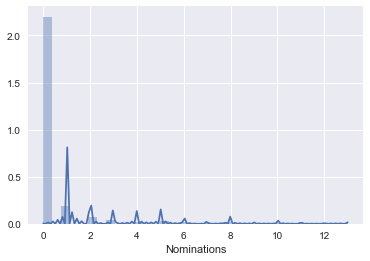

In [46]:
sns.distplot(df['Nominations'])

In [9]:
features, target = ['DomesticTotalGross','RunTime','ProductionBudget','InRelease','OpeningRatio','OpeningGross'], ['shiftLogNoms']
X, y = df[features], df[target].values
X_train, X_holdout, y_train, y_holdout = train_test_split(df[features], df[target], test_size=0.1, random_state=42)

In [10]:
model = sm.OLS(y_train.astype(float),X_train.astype(float))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           shiftLogNoms   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     135.7
Date:                Thu, 19 Jul 2018   Prob (F-statistic):          6.97e-128
Time:                        18:44:52   Log-Likelihood:                -532.77
No. Observations:                1080   AIC:                             1078.
Df Residuals:                    1074   BIC:                             1107.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
DomesticTotalGross  3.855e-09    4.5e-10      8.572      0.000    2.97e-09    4.74e-09
RunTime                0.0036      0.001      6.751      0.000       0.003       0.005
ProductionBudget    6.846e-10   3.05e-10      2.248      0.025    8.71e-11    1.28e-09
InRelease              0.0004      0.000      1.089      0.276      -0.000       0.001
OpeningRatio          -0.0108      0.001     -8.173      0.000      -0.013      -0.008
OpeningGross       -9.164e-09   1.36e-09     -6.717      0.000   -1.18e-08   -6.49e-09
==============================================================================
Omnibus:                      416.085   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1854.593
Skew:                           1.777   Prob(JB):                         0.00
Kurtosis:                       8.347   Cond. No.                     1.75e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


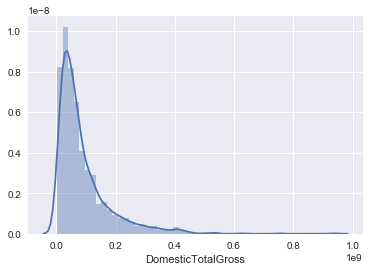

In [47]:
sns.distplot(df['DomesticTotalGross'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


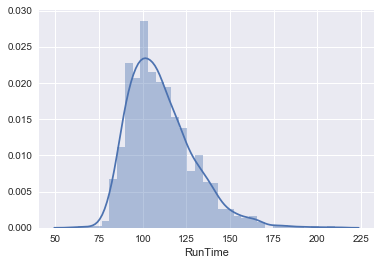

In [48]:
sns.distplot(df['RunTime'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


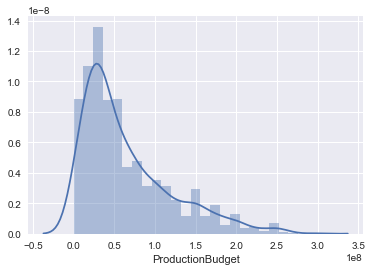

In [49]:
sns.distplot(df['ProductionBudget'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


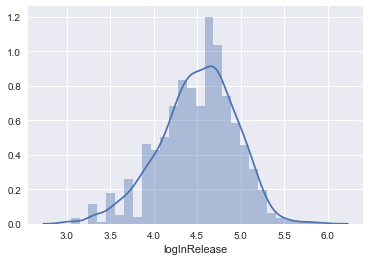

In [50]:
df['logInRelease']=np.log(df['InRelease'])
sns.distplot(df['logInRelease'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


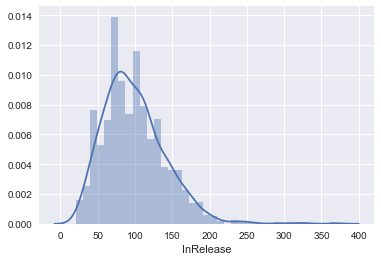

In [51]:
sns.distplot(df['InRelease'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


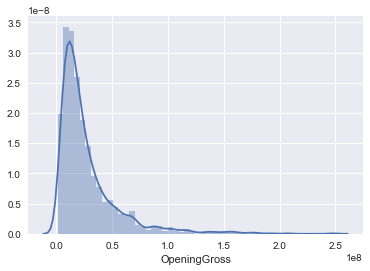

In [52]:
sns.distplot(df['OpeningGross'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


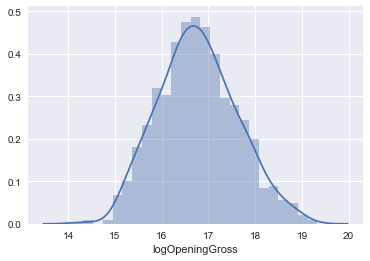

In [53]:
df['logOpeningGross']=np.log(df['OpeningGross'])
sns.distplot(df['logOpeningGross'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


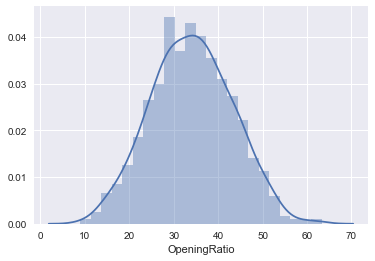

In [54]:
sns.distplot(df['OpeningRatio'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


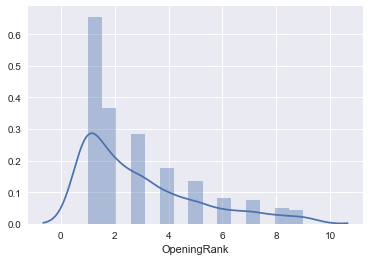

In [55]:
sns.distplot(df['OpeningRank'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


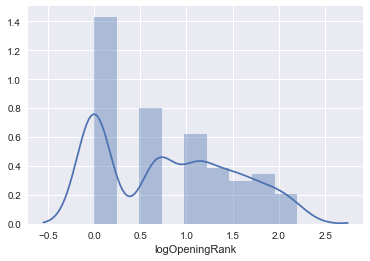

In [56]:
df['logOpeningRank']=np.log(df['OpeningRank'])
sns.distplot(df['logOpeningRank'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


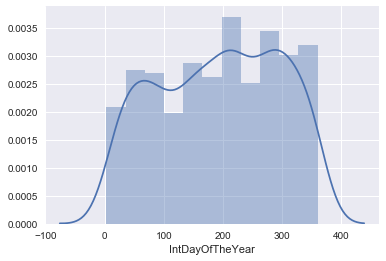

In [57]:
sns.distplot(df['IntDayOfTheYear'])

In [58]:
df.columns

Index(['Title', 'DomesticTotalGross', 'RunTime', 'ReleaseDate', 'Director',
       'ProductionBudget', 'InRelease', 'MpaaRating', 'Distributor', 'Genre',
       'Nominations', 'Wins', 'IntDayOfTheYear', 'IntMonthOfTheYear',
       'DayOfTheYear^2', 'OpeningGross', 'OpeningRank', 'OpeningRatio',
       'GenreMap_Comedy', 'shiftLogNoms', 'logInRelease', 'logOpeningGross',
       'logOpeningRank'],
      dtype='object')

In [59]:
df['logDomesticTotalGross']=np.log(df['DomesticTotalGross'])
df['logProductionBudget']=np.log(df['ProductionBudget'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


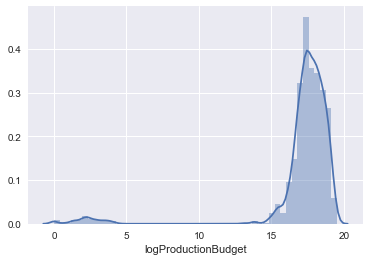

In [60]:
sns.distplot(df['logProductionBudget'])

In [61]:
df.describe()

,DomesticTotalGross,RunTime,ProductionBudget,InRelease,Nominations,Wins,IntDayOfTheYear,IntMonthOfTheYear,DayOfTheYear^2,OpeningGross,OpeningRank,OpeningRatio,GenreMap_Comedy,shiftLogNoms,logInRelease,logOpeningGross,logOpeningRank,logDomesticTotalGross,logProductionBudget
count,1.201000e+03,1201.000000,1.201000e+03,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1.201000e+03,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,8.954208e+07,110.601166,6.491132e+07,98.819317,0.462948,0.108243,193.304746,6.849292,47836.631973,2.778582e+07,2.915903,34.039145,0.233972,0.188675,4.503684,16.773680,0.816634,17.891363,17.138348
std,9.167912e+07,18.714477,5.533292e+07,41.787755,1.511236,0.605481,102.365190,3.358785,39487.687442,2.817507e+07,2.133953,9.161855,0.423531,0.488067,0.434505,0.842469,0.711889,0.935678,2.948767
min,2.956339e+06,63.000000,1.000000e+00,21.000000,0.000000,0.000000,3.000000,1.000000,9.000000,1.355904e+06,1.000000,8.941395,0.000000,0.000000,3.044522,14.119979,0.000000,14.899462,0.000000
25%,3.169181e+07,97.000000,2.500000e+07,70.000000,0.000000,0.000000,104.000000,4.000000,10816.000000,1.073888e+07,1.000000,27.819700,0.000000,0.000000,4.248495,16.189382,0.000000,17.271569,17.034386
50%,6.002226e+07,107.000000,4.500000e+07,91.000000,0.000000,0.000000,202.000000,7.000000,40804.000000,1.862317e+07,2.000000,33.959106,0.000000,0.000000,4.510860,16.739917,0.693147,17.910226,17.622173
75%,1.137466e+08,121.000000,9.000000e+07,121.000000,0.000000,0.000000,281.000000,10.000000,78961.000000,3.361039e+07,4.000000,40.422509,0.000000,0.000000,4.795791,17.330346,1.386294,18.549484,18.315320
max,9.366622e+08,210.000000,3.000000e+08,371.000000,13.000000,11.000000,360.000000,12.000000,129600.000000,2.479667e+08,9.000000,63.333240,1.000000,2.639057,5.916202,19.328805,2.197225,20.657833,19.519293


In [62]:
ProdBudgettweak=df[df['ProductionBudget']<200000000]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


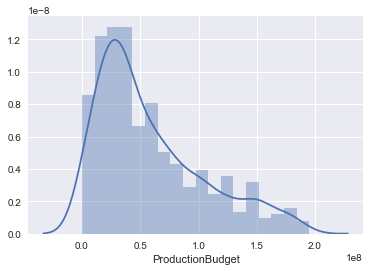

In [63]:
sns.distplot(ProdBudgettweak['ProductionBudget'])

In [67]:
from sklearn.metrics import mean_squared_error
def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))   

In [70]:
ProdBudgettweak.columns

Index(['Title', 'DomesticTotalGross', 'RunTime', 'ReleaseDate', 'Director',
       'ProductionBudget', 'InRelease', 'MpaaRating', 'Distributor', 'Genre',
       'Nominations', 'Wins', 'IntDayOfTheYear', 'IntMonthOfTheYear',
       'DayOfTheYear^2', 'OpeningGross', 'OpeningRank', 'OpeningRatio',
       'GenreMap_Comedy', 'shiftLogNoms', 'logInRelease', 'logOpeningGross',
       'logOpeningRank', 'logDomesticTotalGross', 'logProductionBudget'],
      dtype='object')

In [100]:
features, target = ['DomesticTotalGross','RunTime','ProductionBudget','InRelease','IntDayOfTheYear'], 'Nominations'
X, y = df[features], df[target].values
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

In [99]:
# regular
model2 = sm.OLS(y_train.astype(float),X_train.astype(float))
results = model2.fit()

#results.summary()

lm = LinearRegression()
lm.fit(X_train, y_train)
print('OLS regression score val R^2: %.3f' % lm.score(X_test, y_test))
print('OLS regression score val RMSE: %.3f \n' % RMSE(lm.predict(X_test), y_test))


OLS regression score val R^2: 0.301
OLS regression score val RMSE: 1.389 



#### no feature transform
OLS regression score val R^2: 0.230, OLS regression score val RMSE: 1.045
#### with feature transform
OLS regression score val R^2: 0.187 OLS regression score val RMSE: 1.074

In [101]:
# add in polynomials
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures()

l = LinearRegression()

l.fit(p.fit_transform(X_train), y_train)
print('Degree 2 polynomial regression val R^2: %.3f' 
      % l.score(p.transform(X_test), y_test))

Degree 2 polynomial regression val R^2: 0.380
